In [11]:
print("Hello World")

Hello World


In [12]:
# MY WORK DIRECTORY (WHERE YOU HAVE THE EODP-TS-L1B FOLDER)
workdir = r"C:\Users\34655\Downloads\EODP-TS-L1B"

In [13]:
from pathlib import Path
import numpy as np
import sys
import os
from netCDF4 import Dataset
import matplotlib.pyplot as plt

In [14]:
# Declaration of method to read function - do not modify
def readToa(workdir, filename):

    # concatenate filename and check that it exists
    ncfile = os.path.join(workdir, filename)
    if not os.path.isfile(ncfile):
        sys.exit('File not found ' + ncfile + ". Exiting.")
    print('Reading ' + ncfile)

    # Load dataset
    dset = Dataset(ncfile)

    # Extract data from NetCDF file
    toa = np.array(dset.variables['toa'][:])

    dset.close()

    print('Size of matrix ' + str(toa.shape))

    return toa

In [15]:
# Read equalisation factors - do not modify

with open(os.path.join(workdir, "eq_add.txt"), 'r') as file:
    eq_add = [line.strip() for line in file]
eq_add = np.array(eq_add, dtype=np.float64)
    
print('Size of eq_add ' + str(eq_add.shape))

with open(os.path.join(workdir, "eq_mult.txt"), 'r') as file:
    eq_mult = [line.strip() for line in file]
eq_mult = np.array(eq_mult, dtype=np.float64)

print('Size of eq_mult ' + str(eq_mult.shape))

# gain 
gain = 0.09209303 # [mW/m2/sr/DN]

Size of eq_add (150,)
Size of eq_mult (150,)


In [16]:
# Read Raw data - do not modify
toa = readToa(workdir, os.path.join("input", "ism_toa_VNIR-0.nc")) # Raw data in digital numbers
toa_isrf = readToa(workdir, os.path.join("input", "ism_toa_isrf_VNIR-0.nc")) # Data in radiances

Reading C:\Users\34655\Downloads\EODP-TS-L1B\input\ism_toa_VNIR-0.nc
Size of matrix (100, 150)
Reading C:\Users\34655\Downloads\EODP-TS-L1B\input\ism_toa_isrf_VNIR-0.nc
Size of matrix (100, 150)


In [17]:
# TODO 1 
# Apply the equalisation factors, the substraction and the multiplicative factors to the 
# toa input
# Call your output variable toa_eq

# EQUALISATION
toa_eq = np.zeros(toa.shape) # matrix initialisation

## IMPLEMENT EQ HERE



In [18]:
# TODO 2 

# 1. Apply the gain to the toa_eq calculated previously. Call the output variable toa_l1b
# 2. Apply the gain to the toa. Call the output variable toa_l1b_noeq

# RESTORATION
## IMPLEMENT HERE


C:\Users\34655\AppData\Local\Temp\ipykernel_10940\1499142890.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


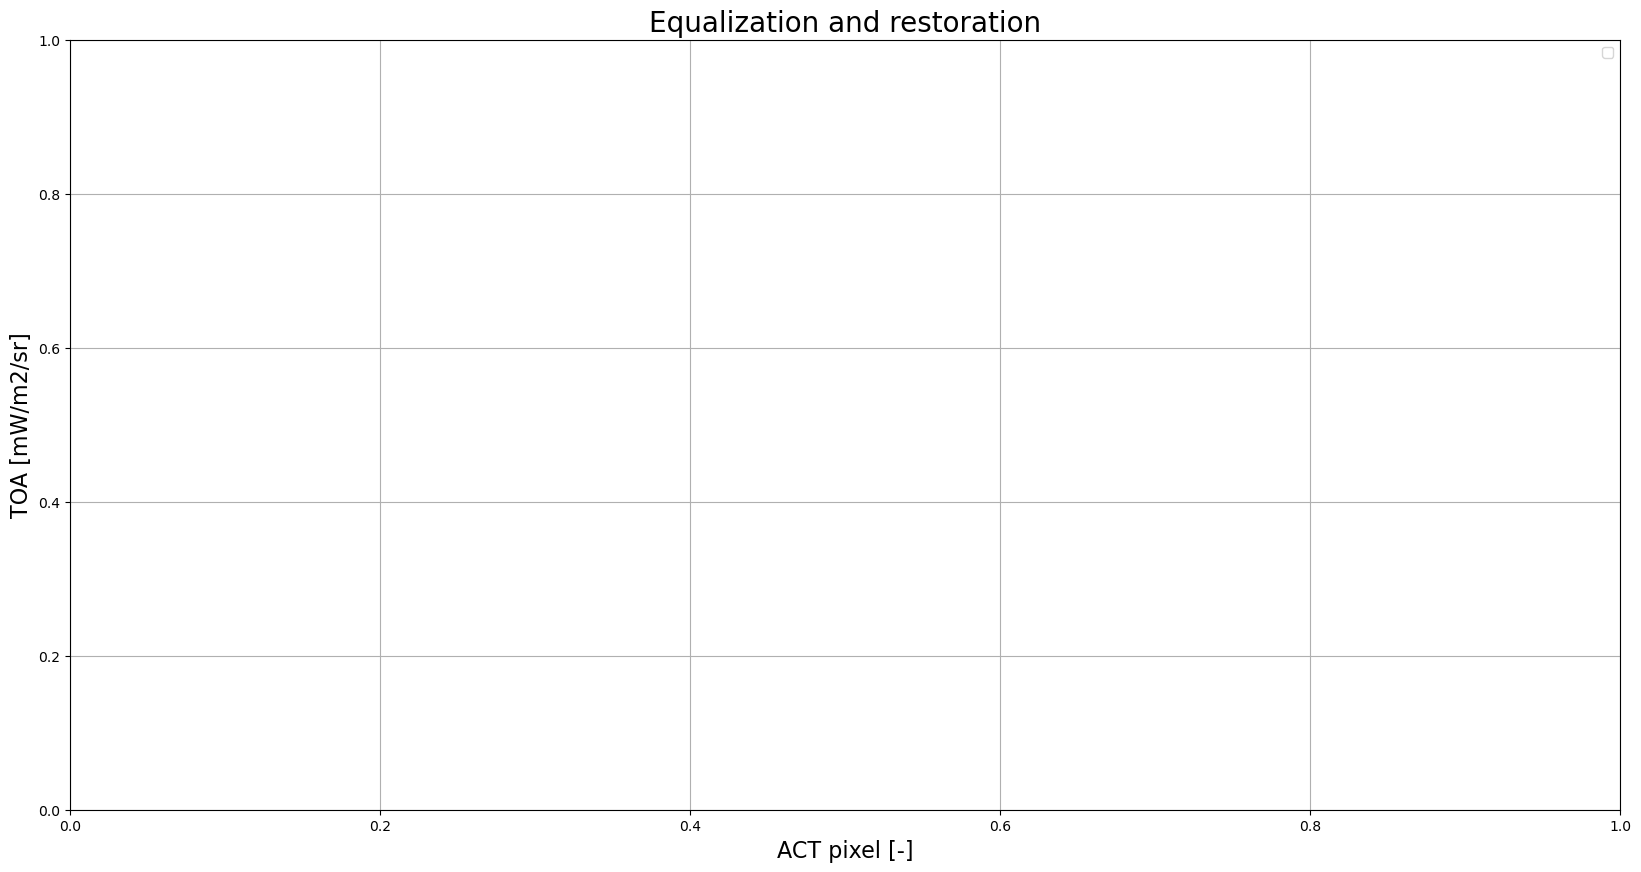

In [19]:
# TODO 3

# PLOT
# Plot in the same plot the toa_l1b (calibrated L1B), toa_l1b_noeq (uncalibrated L1B), and toa_isrf (the ideal)


irow = toa_l1b.shape[0] // 2 # Get central line to avoid edge effects from the ISRF
fig = plt.figure(figsize=(20,10))

## IMPLEMENT HERE
#plt.plot.....

plt.title('Equalization and restoration', fontsize=20)
plt.xlabel('ACT pixel [-]', fontsize=16)
plt.ylabel('TOA [mW/m2/sr]', fontsize=16)
plt.grid()
plt.legend()

